# Oversampling with a CIC filter

### Oversampling Introduction

Oversampling is a particular application of sample rate conversion where an analog signal $x(t)$ is sampled at a much higher rate than strictly necessary accoring to the Nyquist Sampling Theorem, and the sample rate is then reduced by means of downsampling. The reasons for doing this can be many: increasing SNR in the desired frequency band, increasing ADC resolution etc..

As we saw in problem 1, downsampling involves the use of a FIR filter to suppress any frequency components in the full rate signal $x_{\text{old}}[n]$ which would cause aliasing in the decimated signal $x_{\text{new}}[m]$. However, ordinary FIR filtering can be computationally intensive, and using a high-order FIR filter to operate at the sampling speed used for oversampling may cause a prohibitiely large processor load. This is where Cascaded Ingegrator-Comb (CIC) filters come in handy.

### Cascaded Integrator Comb filters

A Cascaded Integrator Comb filter is, in essence, a particular architecture for implementing a *moving average* filter used for downsampling which only requires one integer addition and one integer subtraction per sample. 

$$\begin{align}
v[n] &= x[n] + v[n-1] \tag{1}\\
y[n] &= v[n] - v[n-L] \tag{2}
\end{align}$$

The impulse response of the cascaded systems will be $h[n] = u[n] - u[n-L]$, which is *almost* identical to a moving average filter except we're missing the $\frac{1}{L}$ term. Below is a code cell which when run shows a visualization of the properties of a filter with impulse response $h[n] = u[n] - u[n-8]$. You should see a pole-zero plot of the system, a plot of the filter's magnitude response as well as a 3D representation of the transfer function $H(z)$.

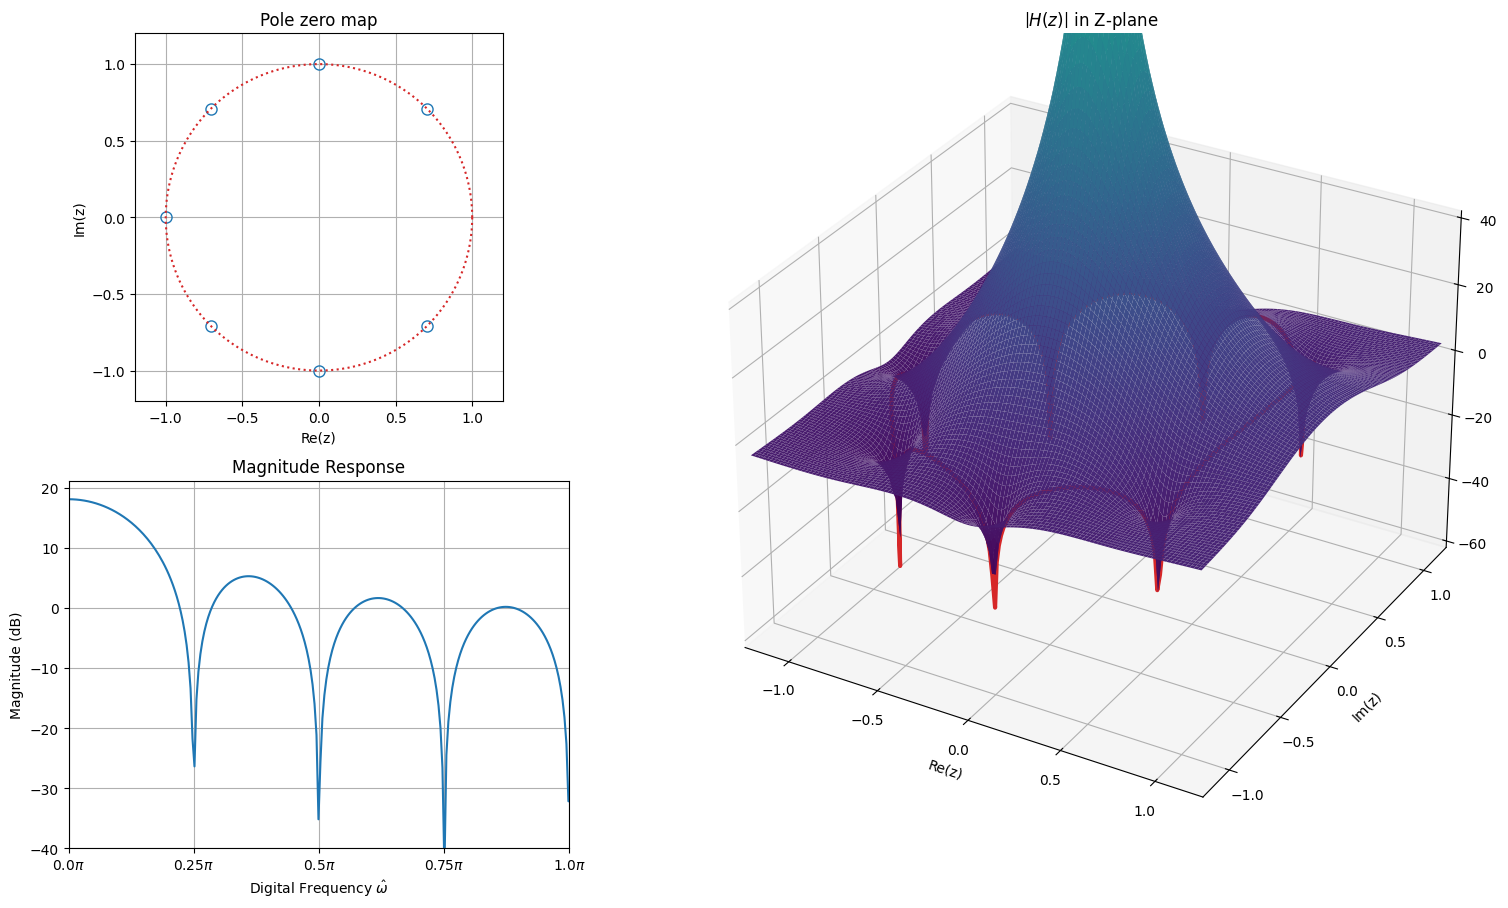

In [2]:
from Kildekode import visualizeTF
import numpy as np
L = 8
hn = np.ones(L)
visualizeTF(b=hn, a=[1])

## a)
* Find the filter coefficients $a_k$ and $b_k$ for the integrator filter in equation $1$ ($v[n] = x[n] + v[n-1] $) and use the function `visualizeTF` to display the filter's magnitude response and pole/zero plot.

C:\Users\hanur\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\signal\_filter_design.py:478: RuntimeWarning: divide by zero encountered in divide
  h = (npp_polyval(zm1, b, tensor=False) /
C:\Users\hanur\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\signal\_filter_design.py:478: RuntimeWarning: invalid value encountered in divide
  h = (npp_polyval(zm1, b, tensor=False) /
C:\Users\hanur\AppData\Local\Programs\Python\Python312\Lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:177: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


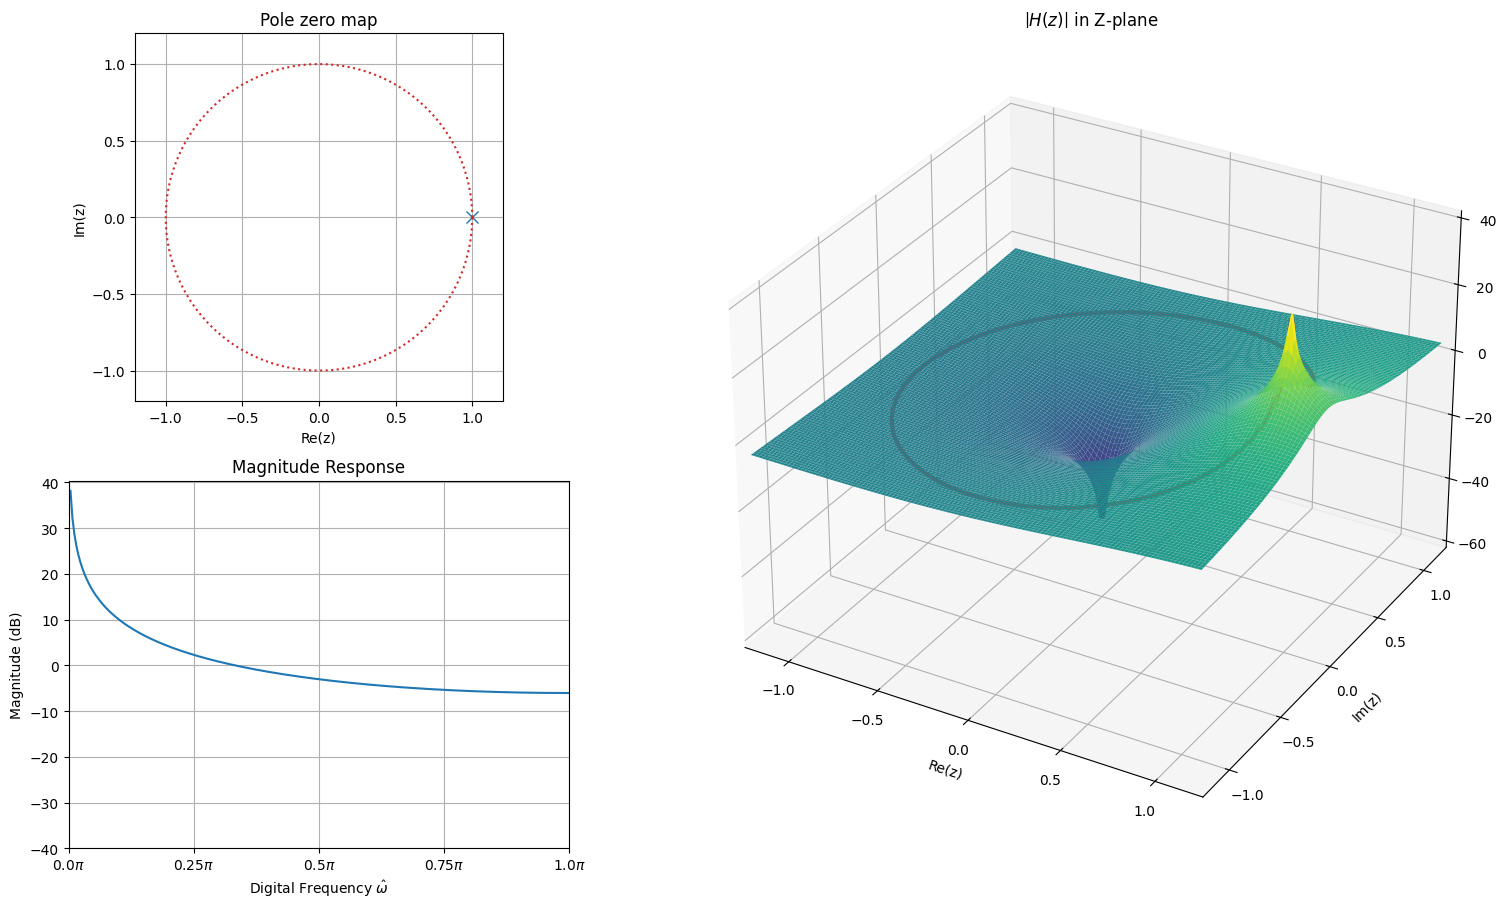

In [4]:
# WRITE YOUR CODE IN THIS CELL:

b = [1]       
a = [1, -1]


visualizeTF(b=b, a=a)

## b)
* Find the filter coefficients $a_k$ and $b_k$ for the comb filter in equation $2$ ($y[n] = v[n] - v[n-L]$ ) where $L=8$, and use the function `visualizeTF` to display the filter's magnitude response and pole/zero plot.

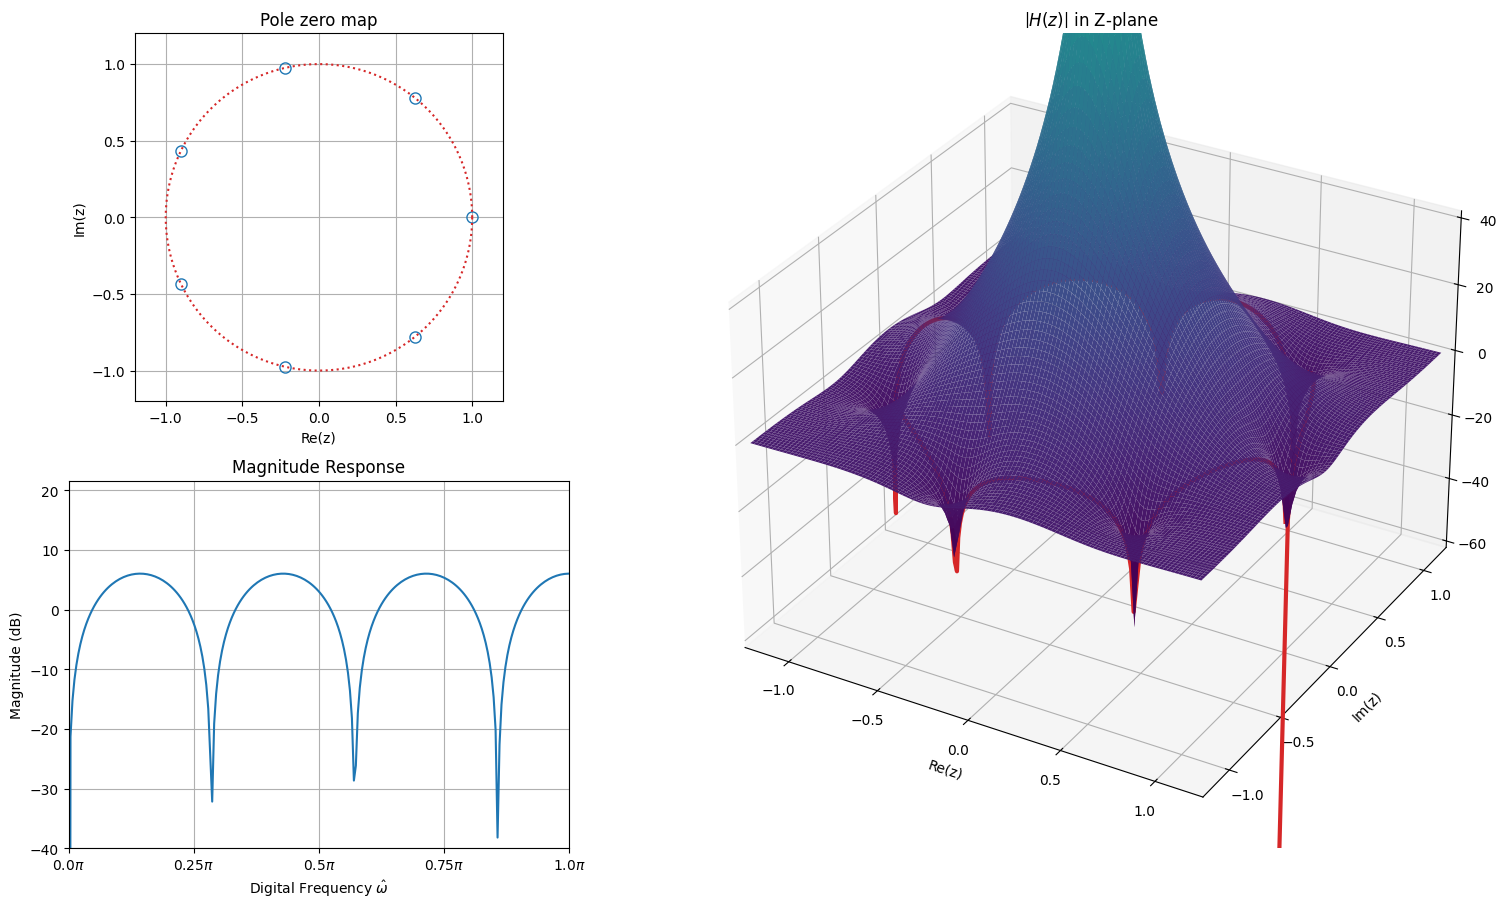

In [7]:
# WRITE YOUR CODE IN THIS CELL:


b = [1, 0, 0, 0, 0, 0, 0, -1]  
a = [1]                         


visualizeTF(b=b, a=a)


## c) 
* Find the filter coefficients $a_k$ and $b_k$ for the filter which equals the cascaded system from equation $1$ and $2$ (v[n] &= x[n] + v[n-1] ) and use the function `visualizeTF` to display the filter's magnitude response and pole/zero plot.
* Explain what is special about the frequency $\hat{\omega} = 0$, and why this system has a frequency response which is identical to that of the moving average filter $h[n] = u[n] - u[n-8]$ which we analyzed in the introduction of this problem

C:\Users\hanur\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\signal\_filter_design.py:478: RuntimeWarning: invalid value encountered in divide
  h = (npp_polyval(zm1, b, tensor=False) /


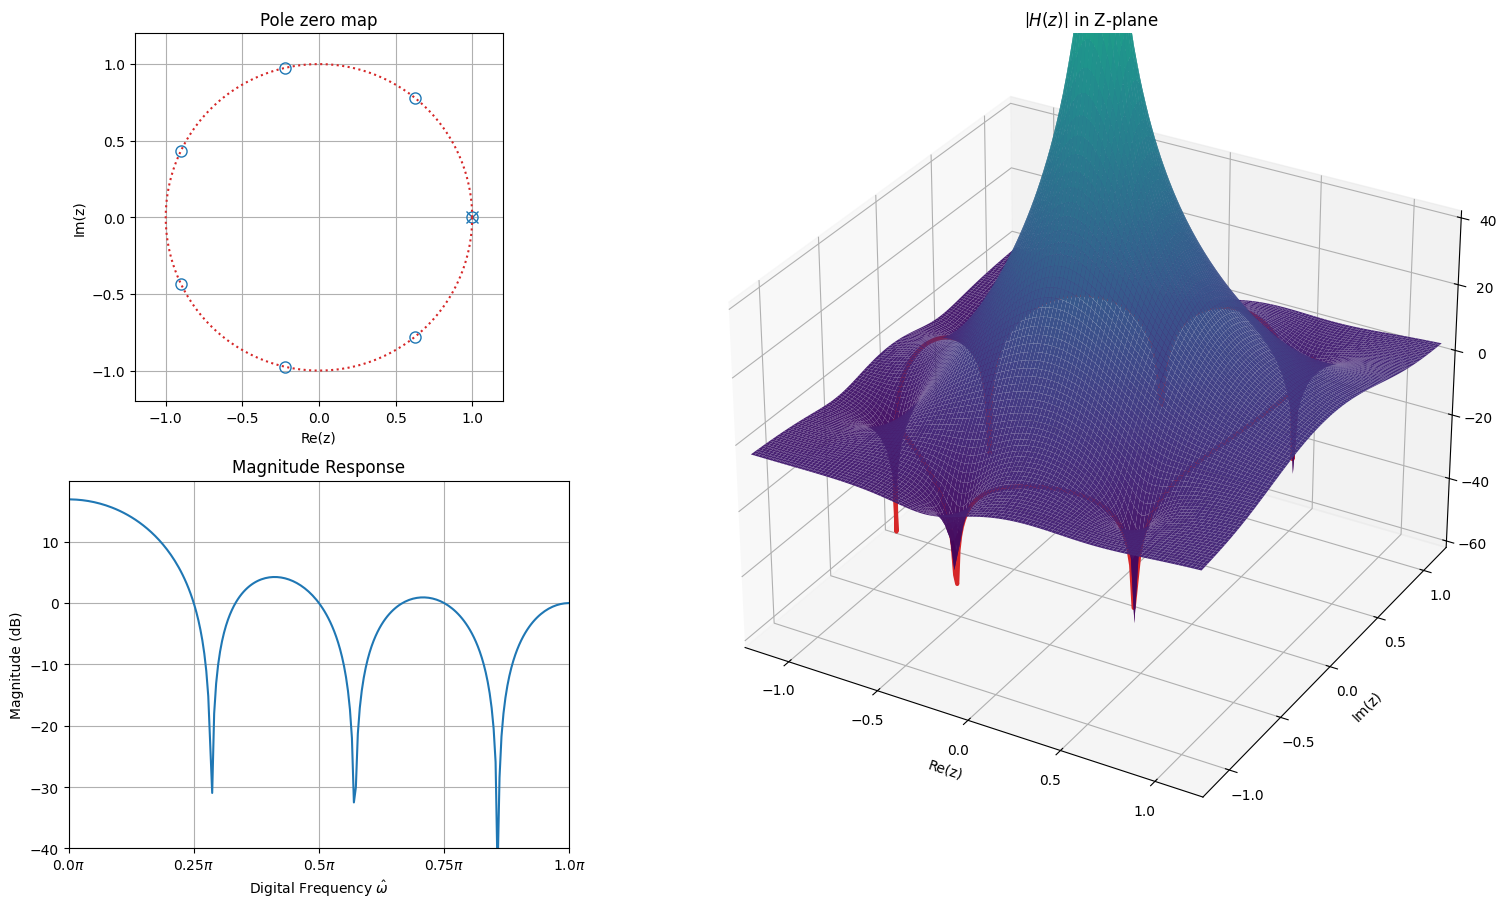

In [8]:
# WRITE YOUR CODE IN THIS CELL:
import numpy as np
#when finding the combined trasfer system
#we could multiply the discrete transfer functions of both systems

# 
#b = [1, 0, 0, 0, 0, 0, 0, -1]  
#a = [1]  



#b = [1]       
#a = [1, -1]

a = np.convolve([1], [1, -1])
b = np.convolve([1], [1, 0, 0, 0, 0, 0, 0, -1])


bSame = [1, 1, 1, 1, 1, 1, 1, 1]  
aSame = [1]                        


visualizeTF(b=b, a=a)
#visualizeTF(b=bSame, a=aSame)

ANSWER THEORY QUESTIONS HERE:
The filter sums x[i-1} + x[i-2}+ x[i-3} ..... x[i-7}
rather than doing the average

The frequency response of a system is the impulse response transformed to the frequency domain.


When using the identities for geometric series we can easily see that

Both filters are also low-pass???


### CIC filters in Downsampling

In downsampling, the CIC filter is typically used in conjunction with a decimation stage where the signal is decimated by a factor $L$. And, since we only actually need to calculate the output for $1$ in $L$ samples, the decimation stage can be placed between the integrator and the comb filter, further simplifying the process as shown below.

[Figure]

One interesting point to note in this filter is that the integrator output $v[n]$ may easily be an ever-increasing value if the signal $x[n]$ is not zero mean. If the signal $v[n]$ is represented using floating-point numbers this might result in loss of precision over time. In practice however, CIC filters are implemented using either integer values or fixed-point decimal representation.

## d) 
* Assuming the input samples $x[n]$ are processed as *integer* data types and not floating-point values, explain why the system illustrated in the figure above will produce the correct output $y[m]$ *even if* the output $v[n]$ from the integrator stage experiences [integer overflow](https://en.wikipedia.org/wiki/Integer_overflow).


The stm32 ADC can sample data with $12$ bit resolution, and outputs this as a stream of $16$-bit integers where each ADC output sample is stored in the $12$ least significant bits. 
## e) 

* Let's assume we are using a CIC filter to downsample the sampled data $x[n]$ from the stm32 ADC, and are representing the output $y[m]$ using 16-bit integers. What is the maximum possible decimation factor $M$ we can use before we risk the output being corrupted by integer overflow?<br>*Hint: what happens if integer overflow occurs twice in the space of $M$ samples?*

In [8]:

#In the integrator stage, each input sample adds to the running sum, so the integrator’s value can grow up to approximately  𝑀×4095
#For a 16-bit signed integer, the maximum representable value is 32767, so we must ensure
#samples in 12 bits


#With M = 16, the maximum accumulation is 4095 * 16 = 65520,


#To prevent integer overflow: M *(2^12) < 2^16
M_max = 2**16/(2**12)


M_max = 16
#M_max = 8

#M_max = "???"
# WRITE YOUR CODE IN THIS CELL:

In [9]:
from hashlib import sha1
assert sha1(str(round(M_max)).encode('utf-8')+b'2b2b9').hexdigest() == '64e5b02dc228042bcc5bd4a8385e30a52cbb0be9', 'Wrong answer for M_max :('; print('Correct answer for M_max :)')

Correct answer for M_max :)
